In today's ICP, we will go over some basic data preprocessing steps using the pandas library. Preprocessing is the process of doing a pre-analysis of data, in order to transform them into a standard and normalized format.

**ICP Summary**

1) Creating empty DataFrames and adding data to it.

2) Reading hapititis Dataset from Github.

3) Performing Data preprocessing and filteration steps on the dataset:


>a) Performing assignment 1 task on this dataset.

>b) checking the unique values for a column

>c)Finding  missing Values

>d) Dropping Missing values (Dataframe level)  

>e) df inplace function

>f) Dropping Missing values (Series level)

>g) Keeping the columns that have certain percentage of data

>h) Pandas value_counts function for checking class distribution

>i) Pandas .plot funtion to plot data



Importing the libraries

In [ ]:
import pandas as pd
import numpy as np

One of the question last time was how to create an empty dataframe and populate it with data?

So below we will first create an empty dataframe and then in the following cell will populate it with some data.

In [ ]:
df_empty= pd.DataFrame()
print(df_empty)

Empty DataFrame
Columns: []
Index: []


lets populate this empty dataframe with some data

In [ ]:
# append columns and their respective values to an empty DataFrame
df_empty['Class'] = ['Big Data', 'Python', 'OCEL.AI_Training']
df_empty['No_of_Sessions'] = [1, 3, 2]
df_empty['Enrolled_students'] = [20, 50,35]
df_empty

,Class,No_of_Sessions,Enrolled_students
0,Big Data,1,20
1,Python,3,50
2,OCEL.AI_Training,2,35


2nd method of creating empty dataframe with column names only and then add data to it.

In [ ]:
# create an Empty DataFrame object With column names and indices
df_empty_2 = pd.DataFrame(columns = ['Class', 'No_of_Sessions', 'Enrolled_students'],
                   index = ['a', 'b', 'c'])

print("The dataframe wiht empty (NaN) values: \n\n")
df_empty_2

The dataframe wiht empty (NaN) values: 




,Class,No_of_Sessions,Enrolled_students
a,NaN,NaN,NaN
b,NaN,NaN,NaN
c,NaN,NaN,NaN


Now add data row wise

In [ ]:
# adding rows to an empty dataframe at existing index
df_empty_2.loc[1] = ['Big Data', 1, 20]
df_empty_2.loc[2] = ['Python', 3, 50]
df_empty_2.loc[3] = ['OCEL.AI_Training', 2, 35]



df_empty_2

,Class,No_of_Sessions,Enrolled_students
a,NaN,NaN,NaN
b,NaN,NaN,NaN
c,NaN,NaN,NaN
1,Big Data,1,20
2,Python,3,50
3,OCEL.AI_Training,2,35


Lets read another dataset (hepatitis dataset)  from Github and lets do the assignment 1 tasks on it

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/datasets/hepatitis/master/data/hepatitis.csv')
df.head(10)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
5,34,female,True,False,False,False,False,True,False,False,False,False,False,0.9,95.0,28.0,4.0,75.0,False,live
6,51,female,False,False,True,False,True,True,False,True,True,False,False,NaN,NaN,NaN,NaN,NaN,False,die
7,23,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,NaN,NaN,NaN,False,live
8,39,female,True,False,True,False,False,True,True,False,False,False,False,0.7,NaN,48.0,4.4,NaN,False,live
9,30,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,120.0,3.9,NaN,False,live


lets look at the size of data (number of rows and columns)

In [ ]:
df.shape

(155, 20)

**a) Performing assignment 1 task on this dataset (Data filteration and preprocessing).**

Now we will split the data into numeric and categorical columns.

First,  we will create a numeric dataframe from our original dataframe (df)

In [ ]:
numeric_df = df.select_dtypes(include=np.number).copy()
numeric_df

,age,bilirubin,alk_phosphate,sgot,albumin,protime
0,30,1.0,85.0,18.0,4.0,NaN
1,50,0.9,135.0,42.0,3.5,NaN
2,78,0.7,96.0,32.0,4.0,NaN
3,31,0.7,46.0,52.0,4.0,80.0
4,34,1.0,NaN,200.0,4.0,NaN
...,...,...,...,...,...,...
150,46,7.6,NaN,242.0,3.3,50.0
151,44,0.9,126.0,142.0,4.3,NaN
152,61,0.8,75.0,20.0,4.1,NaN
153,53,1.5,81.0,19.0,4.1,48.0


lets verify that all the columns in numeric_df has the right datatypes

In [ ]:
numeric_df.dtypes

,0
age,int64
bilirubin,float64
alk_phosphate,float64
sgot,float64
albumin,float64
protime,float64


Finding the mean of the numerical colummns can be found as:

In [ ]:
numeric_df.mean()


,0
age,41.200000
bilirubin,1.427517
alk_phosphate,105.325397
sgot,85.894040
albumin,3.817266
protime,61.852273


Now, we will create a catagorical dataframe from our original dataframe (df)

In [ ]:
categorical_df = df.select_dtypes(exclude=np.number).copy()
categorical_df

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology,class
0,male,False,False,False,False,False,False,False,False,False,False,False,False,live
1,female,False,False,True,False,False,False,False,False,False,False,False,False,live
2,female,True,False,True,False,False,True,False,False,False,False,False,False,live
3,female,NaN,True,False,False,False,True,False,False,False,False,False,False,live
4,female,True,False,False,False,False,True,False,False,False,False,False,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,female,True,False,True,True,True,True,False,False,True,True,True,True,die
151,female,True,False,True,False,False,True,True,False,False,False,False,True,live
152,female,False,False,True,True,False,False,True,False,True,False,False,True,live
153,male,False,False,True,False,False,True,False,True,True,False,True,True,live


verifying the dataypes of each column in categorical dataset

In [ ]:
categorical_df.dtypes

,0
sex,object
steroid,object
antivirals,bool
fatigue,object
malaise,object
anorexia,object
liver_big,object
liver_firm,object
spleen_palpable,object
spiders,object


Let's check the unique values for each of the categorical data

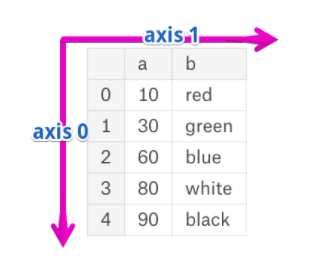

In [ ]:
categorical_df.nunique(axis=0)

,0
sex,2
steroid,2
antivirals,2
fatigue,2
malaise,2
anorexia,2
liver_big,2
liver_firm,2
spleen_palpable,2
spiders,2


checking unique values for a certain column (series level operation)

In [ ]:
df['steroid'].unique()

array([False, True, nan], dtype=object)

**b) Handling Missing Values**

Lets find out the missing values in the original hapititus dataset (df)

In order to check whether our dataset contains missing values, we can use the function isna(), which returns if an cell of the dataset if NaN (missing value) or not. Then we can count how many missing values there are for each column(.sum() function).

In [ ]:
df.isna().sum()

,0
age,0
sex,0
steroid,1
antivirals,0
fatigue,1
malaise,1
anorexia,1
liver_big,10
liver_firm,11
spleen_palpable,5


Now we can count the percentage of missing values for each column, simply by dividing the previous result by the length of the dataset (len(df)) and multiplying per 100.

In [ ]:
(df.isna().sum()/len(df))*100

,0
age,0.000000
sex,0.000000
steroid,0.645161
antivirals,0.000000
fatigue,0.645161
malaise,0.645161
anorexia,0.645161
liver_big,6.451613
liver_firm,7.096774
spleen_palpable,3.225806


When dealing with missing values, different alternatives can be applied:

1)check the source, for example by contacting the data source to correct the missing values

2)drop missing values

3)replace the missing value with a value

4) leave the missing value as it is.

Lets start by looking into dropping the missing values

a) Droping rows  (axis=0)

b) Dropping the columns (axis=1)

In [ ]:
# dropping the columns with missing values
df.dropna(axis=1)

,age,sex,antivirals,histology,class
0,30,male,False,False,live
1,50,female,False,False,live
2,78,female,False,False,live
3,31,female,True,False,live
4,34,female,False,False,live
...,...,...,...,...,...
150,46,female,False,True,die
151,44,female,False,True,live
152,61,female,False,True,live
153,53,male,False,True,live


In [ ]:
df

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live


In [ ]:
# dropping the rows with missing values
df.dropna(axis=0)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
5,34,female,True,False,False,False,False,True,False,False,False,False,False,0.9,95.0,28.0,4.0,75.0,False,live
10,39,female,False,True,False,False,False,False,True,False,False,False,False,1.3,78.0,30.0,4.4,85.0,False,live
11,32,female,True,True,True,False,False,True,True,False,True,False,False,1.0,59.0,249.0,3.7,54.0,False,live
12,41,female,True,True,True,False,False,True,True,False,False,False,False,0.9,81.0,60.0,3.9,52.0,False,live
13,30,female,True,False,True,False,False,True,True,False,False,False,False,2.2,57.0,144.0,4.9,78.0,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,45,female,True,True,False,False,False,True,False,False,False,False,False,1.3,85.0,44.0,4.2,85.0,True,live
143,49,female,False,False,True,True,False,True,False,True,True,False,False,1.4,85.0,70.0,3.5,35.0,True,die
145,31,female,False,False,True,False,False,True,False,False,False,False,False,1.2,75.0,173.0,4.2,54.0,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live


In [ ]:
df

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live


Note, removed values are not applied to the original dataframe, but only to the result. We can use the argument inplace=True in order to store changes in the original dataframe (df.dropna(axis=1,inplace=True)).

In [ ]:
df

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live


As an alternative, we can specify only the column on which the dropping operation must be applied. In the following example, only missing rows related to the column liver_big are considered. This can be achieved through the subset parameter, which permits to specify the subset of columns where to apply the dropping operation.

First we will create a copy of df (df1) and then remove missing value

In [ ]:
df1=df.copy()
df1

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live


In [ ]:
# drop only the rows in which the column "albumin" has missing values
df1.dropna(subset=['albumin'],axis=0,inplace=True)
df1

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live


Now we can check whether there are still missing values for the column "albumin"

In [ ]:
df1.isna().sum()/len(df1)*100

,0
age,0.000000
sex,0.000000
steroid,0.719424
antivirals,0.000000
fatigue,0.000000
malaise,0.000000
anorexia,0.000000
liver_big,5.035971
liver_firm,5.755396
spleen_palpable,2.877698


Another alternative involves the dropping of columns where a certain percentage of not-null values is available. This can be achieved through the thresh parameter. In the following example we keep only columns where there are at least the 80% of not null values.

In [ ]:
df1.dropna(thresh=0.8*len(df1),axis=1,inplace=True)
df1

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,True,live


In [ ]:
len(df1)

139

checking the number of live and die instances in "class" column (finding class distribution)

In [ ]:
df1['class'].value_counts()

,count
class,
live,112
die,27


Finding the this data in percentage

In [ ]:
df1['class'].value_counts()/len(df1)*100

,count
class,
live,80.57554
die,19.42446


plotting this data

<ipython-input-30-9f15172009ab>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df1['class']).plot.bar()


<Axes: xlabel='class'>

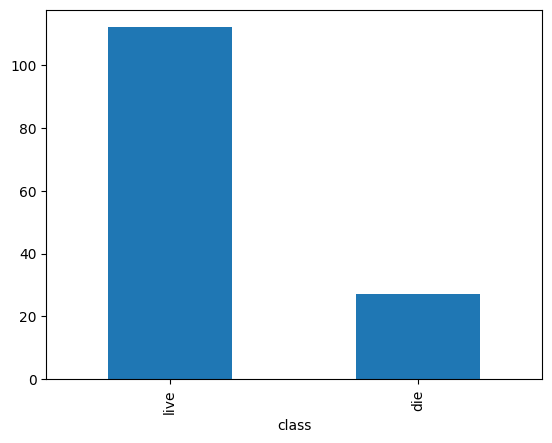

In [ ]:
pd.value_counts(df1['class']).plot.bar()

ICP 1: Replace the missing values in numeric columns of  dataset (hepatitis dataset) with the mean values of the column.


In [ ]:
# Step 1: Firstly, I have created a new dataframe from the main dataframe to implement the request and printed that dataframe.
df_newdataframe=df.copy()
from tabulate import tabulate
print(tabulate(df_newdataframe, headers='keys', tablefmt='pretty')) #styling the table.

# Step 2: Next I find the meanvalue of the column and I have printed the meanvalue.
Meanvalue = df_newdataframe.mean(numeric_only=True)
print(Meanvalue)

# Step 3: In this step, I have replaced the null values with the meanvalue.
df_newdataframe=df_newdataframe.fillna(Meanvalue)

# Step 4: Here, I have printed the dataframe after performing the above operation.
from tabulate import tabulate
print(tabulate(df_newdataframe, headers='keys', tablefmt='pretty')) #styling the table.

# Step 5: Finally, I have verified the null values in the columns.
print(df_newdataframe.isnull().sum())

+-----+-----+--------+---------+------------+---------+---------+----------+-----------+------------+-----------------+---------+---------+---------+-----------+---------------+-------+---------+---------+-----------+-------+
|     | age |  sex   | steroid | antivirals | fatigue | malaise | anorexia | liver_big | liver_firm | spleen_palpable | spiders | ascites | varices | bilirubin | alk_phosphate | sgot  | albumin | protime | histology | class |
+-----+-----+--------+---------+------------+---------+---------+----------+-----------+------------+-----------------+---------+---------+---------+-----------+---------------+-------+---------+---------+-----------+-------+
|  0  | 30  |  male  |  False  |   False    |  False  |  False  |  False   |   False   |   False    |      False      |  False  |  False  |  False  |    1.0    |     85.0      | 18.0  |   4.0   |   nan   |   False   | live  |
|  1  | 50  | female |  False  |   False    |  True   |  False  |  False   |   False   |   False